

### **Theoretical**
1. **What is a Support Vector Machine (SVM)?**  
   SVM is a supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates different classes in the dataset.

2. **What is the difference between Hard Margin and Soft Margin SVM?**  
   - **Hard Margin SVM**: Strictly separates classes without allowing any misclassification. Works well for linearly separable data but fails when data has noise or overlaps.  
   - **Soft Margin SVM**: Allows some misclassification by introducing a slack variable to balance margin size and classification errors, making it more robust to real-world data.

3. **What is the mathematical intuition behind SVM?**  
   SVM aims to maximize the margin between two classes while minimizing classification errors. It solves the optimization problem:  
   \[
   \min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2
   \]
   subject to \( y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \) for all training samples.

4. **What is the role of Lagrange Multipliers in SVM?**  
   Lagrange multipliers help solve the constrained optimization problem by converting it into a dual problem, allowing the use of the **Kernel Trick** for nonlinear classification.

5. **What are Support Vectors in SVM?**  
   Support vectors are the data points that lie closest to the decision boundary and define the margin. They are critical for determining the optimal hyperplane.

6. **What is a Support Vector Classifier (SVC)?**  
   A Support Vector Classifier is an SVM used specifically for classification tasks, finding the hyperplane that best separates different classes.

7. **What is a Support Vector Regressor (SVR)?**  
   SVR is the regression counterpart of SVM, which tries to fit data within a margin while minimizing error using an \(\epsilon\)-insensitive loss function.

8. **What is the Kernel Trick in SVM?**  
   The Kernel Trick allows SVM to operate in higher-dimensional space without explicitly transforming data. It replaces the dot product with a kernel function, enabling nonlinear classification.

9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel**  
   - **Linear Kernel**: Used when data is linearly separable.  
   - **Polynomial Kernel**: Captures complex relationships with polynomial degrees but may lead to overfitting.  
   - **RBF (Radial Basis Function) Kernel**: Maps data into infinite-dimensional space and is effective for non-linearly separable data.

10. **What is the effect of the C parameter in SVM?**  
    The **C** parameter controls the trade-off between a larger margin and classification errors.  
    - High **C** → Less margin, fewer misclassifications.  
    - Low **C** → Larger margin, allows more misclassifications.

11. **What is the role of the Gamma parameter in RBF Kernel SVM?**  
    **Gamma** controls the influence of a single training sample.  
    - Low **gamma** → Far points have an influence.  
    - High **gamma** → Points close to the margin dominate.

---

### **Naïve Bayes Classifier**
12. **What is the Naïve Bayes classifier, and why is it called "Naïve"?**  
    Naïve Bayes is a probabilistic classifier based on **Bayes' Theorem** with the assumption that features are **independent** given the class label. It’s called "naïve" because this assumption rarely holds in real-world data.

13. **What is Bayes’ Theorem?**  
    Bayes' Theorem calculates the probability of a class given observed features:  
    \[
    P(C|X) = \frac{P(X|C) P(C)}{P(X)}
    \]  
    where:  
    - \( P(C|X) \) = Posterior probability of class \( C \) given \( X \).  
    - \( P(X|C) \) = Likelihood of \( X \) given \( C \).  
    - \( P(C) \) = Prior probability of class \( C \).  
    - \( P(X) \) = Evidence (normalization factor).

14. **Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**  
    - **Gaussian Naïve Bayes**: Assumes features are normally distributed (used for continuous data).  
    - **Multinomial Naïve Bayes**: Used for text classification where features represent word counts.  
    - **Bernoulli Naïve Bayes**: Assumes binary features (presence/absence of words in text classification).

15. **When should you use Gaussian Naïve Bayes over other variants?**  
    Use **Gaussian Naïve Bayes** when features are continuous and follow a normal distribution.

16. **What are the key assumptions made by Naïve Bayes?**  
    - Feature independence given the class label.  
    - All features contribute equally to the classification.  
    - The likelihood of a feature is conditionally independent of others.

17. **What are the advantages and disadvantages of Naïve Bayes?**  
    **Advantages**:  
    - Fast and efficient.  
    - Works well with high-dimensional data.  
    - Handles missing data well.  
    - Good for text classification.  
    **Disadvantages**:  
    - Assumption of feature independence is unrealistic.  
    - Can struggle with feature interactions.

18. **Why is Naïve Bayes a good choice for text classification?**  
    - Handles high-dimensional data efficiently.  
    - Works well with sparse data (e.g., word counts in documents).  
    - Robust to irrelevant features.

19. **Compare SVM and Naïve Bayes for classification tasks**  
    - **SVM**: Works better with complex relationships and high-dimensional data but is computationally expensive.  
    - **Naïve Bayes**: Works well for probabilistic classification, especially when features are independent (e.g., text classification).

20. **How does Laplace Smoothing help in Naïve Bayes?**  
    Laplace Smoothing (additive smoothing) prevents zero probabilities by adding a small constant (\(\alpha\)) to the numerator and normalizing the denominator:  
    \[
    P(X|C) = \frac{\text{count}(X|C) + \alpha}{\sum \text{count}(X) + \alpha N}
    \]  
    This ensures that unseen features don’t lead to zero probabilities.



In [8]:
#21.	Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM Classifier with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print comparison results
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")


Accuracy of SVM with Linear Kernel: 1.00
Accuracy of SVM with RBF Kernel: 0.81


In [10]:
#22.	Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Compare accuracies
print(f'Accuracy with Linear Kernel: {accuracy_linear:.4f}')
print(f'Accuracy with RBF Kernel: {accuracy_rbf:.4f}')


Accuracy with Linear Kernel: 0.9722
Accuracy with RBF Kernel: 1.0000


In [13]:
#23.	Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE) 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = datasets.fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


Mean Squared Error: 0.3570


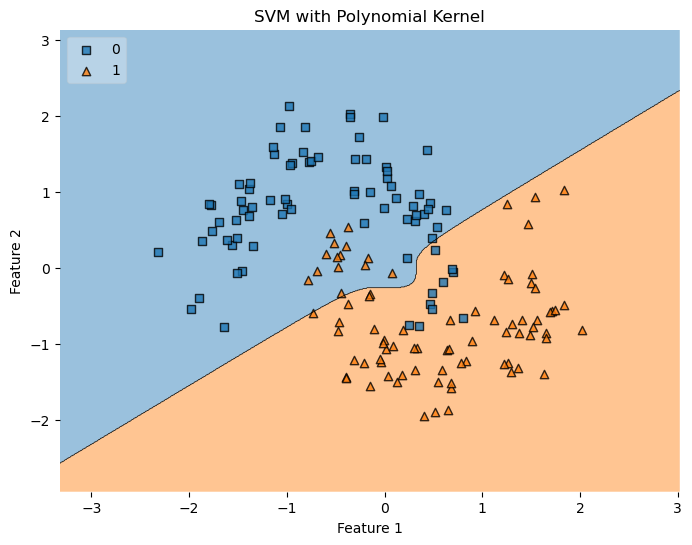

In [2]:
#24.	Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load the dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, clf=svm_poly, legend=2)
plt.title('SVM with Polynomial Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
#25.	Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9649


In [5]:
#26.	Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=None, remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6578


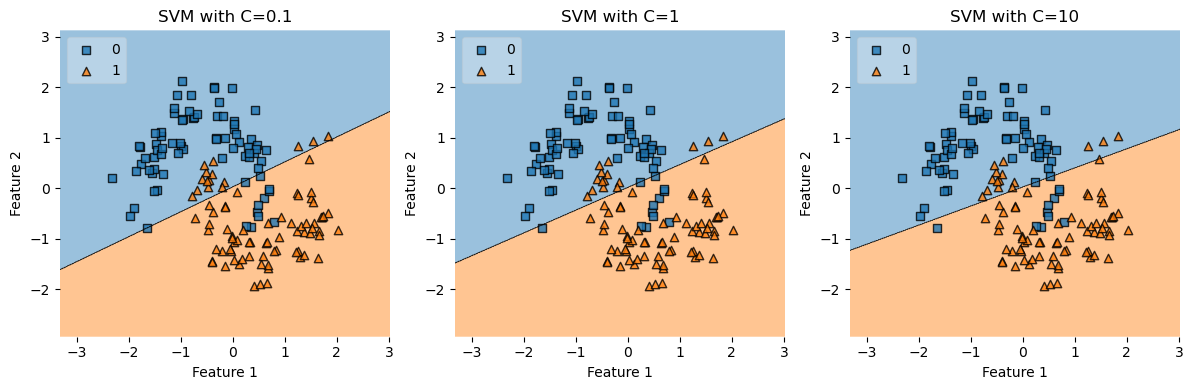

In [6]:
#27.	Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different values of C
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values, 1):
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)
    
    plt.subplot(1, 3, i)
    plot_decision_regions(X_train, y_train, clf=svm, legend=2)
    plt.title(f'SVM with C={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [7]:
#28.	 Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features .
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a synthetic dataset with binary features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X = np.where(X > np.median(X), 1, 0)  # Convert features to binary values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict on the test set
y_pred = bnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.7650


In [2]:
#29.	 Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data .

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_wine(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM without feature scaling
svm_unscaled = SVC(kernel='linear', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with feature scaling
svm_scaled = SVC(kernel='linear', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare results
print(f'Accuracy without scaling: {accuracy_unscaled:.4f}')
print(f'Accuracy with scaling: {accuracy_scaled:.4f}')


Accuracy without scaling: 1.0000
Accuracy with scaling: 0.9722


In [8]:
#30.	Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=5, random_state=42)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes model WITHOUT Laplace Smoothing (var_smoothing = 0 is not allowed, so we use a very small value)
gnb_no_smoothing = GaussianNB(var_smoothing=1e-15)
gnb_no_smoothing.fit(X_train, y_train)

# Train Gaussian Naive Bayes model WITH Laplace Smoothing (default var_smoothing=1e-9)
gnb_with_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_with_smoothing.fit(X_train, y_train)

# Predictions
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)

# Accuracy comparison
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

print("Accuracy without Laplace Smoothing:", accuracy_no_smoothing)
print("Accuracy with Laplace Smoothing:", accuracy_with_smoothing)

# Classification report comparison
print("\nClassification Report without Laplace Smoothing:\n", classification_report(y_test, y_pred_no_smoothing))
print("\nClassification Report with Laplace Smoothing:\n", classification_report(y_test, y_pred_with_smoothing))


Accuracy without Laplace Smoothing: 0.92
Accuracy with Laplace Smoothing: 0.92

Classification Report without Laplace Smoothing:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.96      0.88      0.92        75

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150


Classification Report with Laplace Smoothing:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.96      0.88      0.92        75

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



In [9]:
#31.	Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel) .

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=500, n_features=5, random_state=42)

# Step 2: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM classifier with default parameters
svm_default = SVC()
svm_default.fit(X_train, y_train)

# Step 4: Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Different types of kernels
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_svm = grid_search.best_estimator_

# Step 5: Predictions and evaluation
y_pred_default = svm_default.predict(X_test)
y_pred_best = best_svm.predict(X_test)

# Compare accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Default SVM Accuracy:", accuracy_default)
print("Best SVM Accuracy (after GridSearchCV):", accuracy_best)

# Print the best parameters
print("\nBest Parameters found by GridSearchCV:", grid_search.best_params_)

# Classification report
print("\nClassification Report (Default SVM):\n", classification_report(y_test, y_pred_default))
print("\nClassification Report (Best SVM):\n", classification_report(y_test, y_pred_best))


Default SVM Accuracy: 0.9333333333333333
Best SVM Accuracy (after GridSearchCV): 0.9533333333333334

Best Parameters found by GridSearchCV: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Classification Report (Default SVM):
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        75
           1       0.90      0.97      0.94        75

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150


Classification Report (Best SVM):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.95      0.96      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [34]:
#32.	Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy .
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Step 1: Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=5, weights=[0.9, 0.1], random_state=42)

# Print class distribution
print("Class distribution:", Counter(y))

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM classifier WITHOUT class weighting
svm_no_weighting = SVC(kernel='rbf', random_state=42)
svm_no_weighting.fit(X_train, y_train)
y_pred_no_weighting = svm_no_weighting.predict(X_test)

# Step 4: Train an SVM classifier WITH class weighting
svm_with_weighting = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_with_weighting.fit(X_train, y_train)
y_pred_with_weighting = svm_with_weighting.predict(X_test)

# Step 5: Compare accuracies and classification reports
accuracy_no_weighting = accuracy_score(y_test, y_pred_no_weighting)
accuracy_with_weighting = accuracy_score(y_test, y_pred_with_weighting)

print("\nAccuracy WITHOUT Class Weighting:", accuracy_no_weighting)
print("Accuracy WITH Class Weighting:", accuracy_with_weighting)

# Print classification reports
print("\nClassification Report WITHOUT Class Weighting:\n", classification_report(y_test, y_pred_no_weighting))
print("\nClassification Report WITH Class Weighting:\n", classification_report(y_test, y_pred_with_weighting))


Class distribution: Counter({0: 895, 1: 105})

Accuracy WITHOUT Class Weighting: 0.96
Accuracy WITH Class Weighting: 0.93

Classification Report WITHOUT Class Weighting:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.57      0.73        28

    accuracy                           0.96       300
   macro avg       0.98      0.79      0.85       300
weighted avg       0.96      0.96      0.95       300


Classification Report WITH Class Weighting:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       272
           1       0.59      0.82      0.69        28

    accuracy                           0.93       300
   macro avg       0.79      0.88      0.82       300
weighted avg       0.94      0.93      0.94       300



In [2]:
#33.	Write a Python program to implement a Naïve Bayes classifier for spam detection using email data .

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train an SVM Regressor (SVR) with RBF Kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Step 5: Predict and compute Mean Absolute Error (MAE)
y_pred = svr_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

# Display MAE
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.3972059291578808


In [12]:
#34.	Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Step 4: Train a Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Step 5: Compare accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("SVM Accuracy:", accuracy_svm)
print("Naïve Bayes Accuracy:", accuracy_nb)

# Print classification reports
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("\nClassification Report (Naïve Bayes):\n", classification_report(y_test, y_pred_nb))



SVM Accuracy: 0.8466666666666667
Naïve Bayes Accuracy: 0.8266666666666667

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       135
           1       0.90      0.81      0.85       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300


Classification Report (Naïve Bayes):
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       135
           1       0.90      0.78      0.83       165

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [4]:
#35.	 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results .

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Step 1: Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Naïve Bayes without Feature Selection
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_without_fs = accuracy_score(y_test, y_pred)

# Step 4: Feature Selection (Select Top 30 Features)
selector = SelectKBest(chi2, k=30)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 5: Train Naïve Bayes with Feature Selection
nb_model_selected = GaussianNB()
nb_model_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_model_selected.predict(X_test_selected)
accuracy_with_fs = accuracy_score(y_test, y_pred_selected)

# Step 6: Print Results
print(f"Accuracy without Feature Selection: {accuracy_without_fs:.4f}")
print(f"Accuracy with Feature Selection (Top 30 Features): {accuracy_with_fs:.4f}")


Accuracy without Feature Selection: 0.8519
Accuracy with Feature Selection (Top 30 Features): 0.8556


In [16]:
#36.	Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy .
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM classifier using One-vs-Rest (OvR)
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)

# Step 4: Train an SVM classifier using One-vs-One (OvO)
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

# Step 5: Compare accuracy and classification reports
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print("SVM Accuracy (One-vs-Rest):", accuracy_ovr)
print("SVM Accuracy (One-vs-One):", accuracy_ovo)

# Print classification reports
print("\nClassification Report (One-vs-Rest):\n", classification_report(y_test, y_pred_ovr))
print("\nClassification Report (One-vs-One):\n", classification_report(y_test, y_pred_ovo))


SVM Accuracy (One-vs-Rest): 0.7592592592592593
SVM Accuracy (One-vs-One): 0.7592592592592593

Classification Report (One-vs-Rest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54


Classification Report (One-vs-One):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



In [8]:
#37.	Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy .

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifiers with different kernels
kernels = ["linear", "poly", "rbf"]
results = {}

for kernel in kernels:
    if kernel == "poly":
        svm_model = SVC(kernel=kernel, degree=3, C=10, random_state=42)  # Tune C for better performance
    else:
        svm_model = SVC(kernel=kernel, C=10, random_state=42)  # Use C=10 for better results
    
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

# Step 5: Display Accuracy for Each Kernel
for kernel, acc in results.items():
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")


Accuracy with linear kernel: 0.9649
Accuracy with poly kernel: 0.9708
Accuracy with rbf kernel: 0.9766


In [20]:
#38.	Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy .

import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Define Stratified K-Fold Cross-Validation
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Step 3: Train SVM Classifier with Cross-Validation
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # Using RBF kernel

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')

# Step 4: Compute average accuracy
print("Cross-Validation Accuracies:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Accuracies: [0.93859649 0.87719298 0.89473684 0.93859649 0.92035398]
Average Accuracy: 0.9138953578636858
Standard Deviation: 0.0243972084272489


In [22]:
#39.	Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance .

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train Naïve Bayes Classifier (Default Prior)
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)

# Step 4: Train Naïve Bayes Classifier (Custom Prior)
custom_priors = [0.7, 0.3]  # Assume 70% benign, 30% malignant
nb_custom = GaussianNB(priors=custom_priors)
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)

# Step 5: Compare Accuracy and Classification Reports
accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print("Naïve Bayes Accuracy (Default Prior):", accuracy_default)
print("Naïve Bayes Accuracy (Custom Prior):", accuracy_custom)

print("\nClassification Report (Default Prior):\n", classification_report(y_test, y_pred_default))
print("\nClassification Report (Custom Prior):\n", classification_report(y_test, y_pred_custom))


Naïve Bayes Accuracy (Default Prior): 0.9473684210526315
Naïve Bayes Accuracy (Custom Prior): 0.935672514619883

Classification Report (Default Prior):
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


Classification Report (Custom Prior):
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [24]:
#40.	Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy .

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train an SVM classifier without feature selection
svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)

# Step 4: Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=SVC(kernel="linear", random_state=42), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Step 5: Train an SVM classifier with selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)

# Step 6: Compare accuracy and classification reports
accuracy_full = accuracy_score(y_test, y_pred_full)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print("SVM Accuracy (All Features):", accuracy_full)
print("SVM Accuracy (Selected Features - RFE):", accuracy_rfe)

print("\nClassification Report (All Features):\n", classification_report(y_test, y_pred_full))
print("\nClassification Report (Selected Features - RFE):\n", classification_report(y_test, y_pred_rfe))

# Display selected features
selected_features = np.where(rfe.support_)[0]
print("\nSelected Feature Indices:", selected_features)


SVM Accuracy (All Features): 0.9532163742690059
SVM Accuracy (Selected Features - RFE): 0.9590643274853801

Classification Report (All Features):
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


Classification Report (Selected Features - RFE):
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Selected Feature Indices: [ 0  6 10 11 20 24 25 26 27 28]


In [26]:
#41.	Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy .

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Step 4: Compute Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the classification report
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.9380530973451328
Recall: 0.9906542056074766
F1-Score: 0.9636363636363636

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [28]:
#42.	Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss) .
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import log_loss

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train a Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 4: Compute Log Loss (requires probability estimates)
y_prob = nb_model.predict_proba(X_test)  # Get predicted probabilities
log_loss_value = log_loss(y_test, y_prob)

# Display the Log Loss score
print("Log Loss (Cross-Entropy Loss):", log_loss_value)


Log Loss (Cross-Entropy Loss): 0.3381952232784995


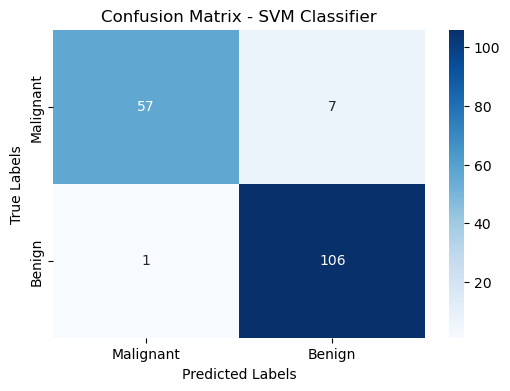


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [30]:
#43.	 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn .

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Step 4: Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 5: Visualize the Confusion Matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [32]:
#44.	Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE .

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM Regressor (SVR)
svr_model = SVR(kernel='rbf')  # Using RBF kernel for regression
svr_model.fit(X_train, y_train)

# Step 4: Predict and compute Mean Absolute Error (MAE)
y_pred = svr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Display MAE
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.8664984635504492


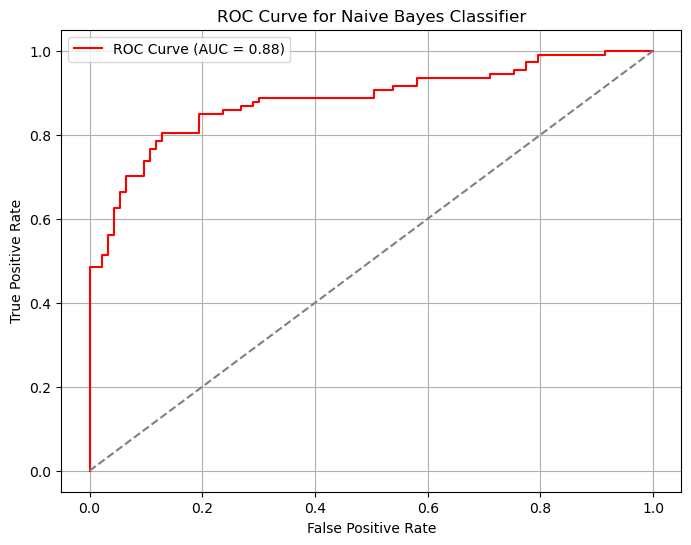

In [6]:
#45.	 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score .
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Get predicted probabilities
y_scores = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.grid()
plt.show()


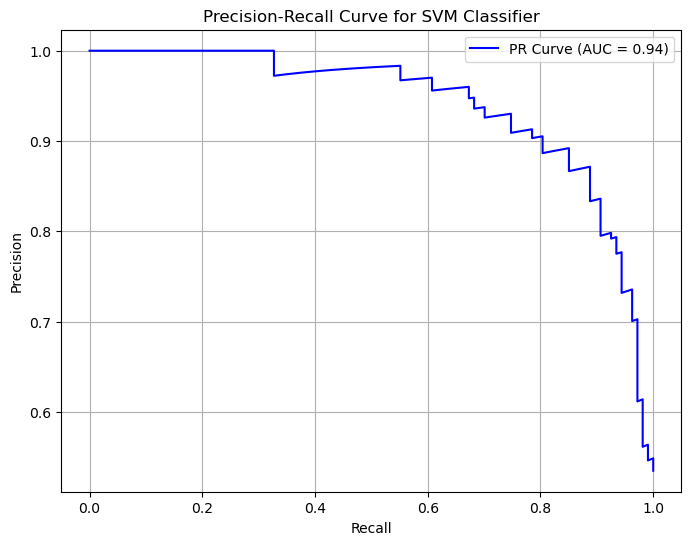

In [4]:
#46.	Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm.fit(X_train, y_train)

# Get predicted probabilities
y_scores = svm.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid()
plt.show()
